<a href="https://colab.research.google.com/github/kanchanrai97/Telecom-Data-Analysis/blob/main/O2R2_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Importing Libraries and Dataset

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import math

In [75]:
df=pd.read_excel('/content/Telecom.xlsx', sheet_name="Telecom")
df.head()

,CustomerID,PlanTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersons,NumberOfFollowups,PlanPitched,PreferredServiceStar,MaritalStatus,NumberOfUpgrades,iPhone,PitchSatisfactionScore,PhoneContract,NumberOfChildren,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [76]:
df.shape

(4888, 20)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              4888 non-null   int64  
 1   PlanTaken               4888 non-null   int64  
 2   Age                     4662 non-null   float64
 3   TypeofContact           4863 non-null   object 
 4   CityTier                4888 non-null   int64  
 5   DurationOfPitch         4637 non-null   float64
 6   Occupation              4888 non-null   object 
 7   Gender                  4888 non-null   object 
 8   NumberOfPersons         4888 non-null   int64  
 9   NumberOfFollowups       4843 non-null   float64
 10  PlanPitched             4888 non-null   object 
 11  PreferredServiceStar    4862 non-null   float64
 12  MaritalStatus           4888 non-null   object 
 13  NumberOfUpgrades        4748 non-null   float64
 14  iPhone                  4888 non-null   

In [78]:
df.describe()

,CustomerID,PlanTaken,Age,CityTier,DurationOfPitch,NumberOfPersons,NumberOfFollowups,PreferredServiceStar,NumberOfUpgrades,iPhone,PitchSatisfactionScore,PhoneContract,NumberOfChildren,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [79]:
df['PlanTaken'].value_counts()

,count
PlanTaken,
0,3968
1,920


In [80]:
df['PlanPitched'].value_counts()

,count
PlanPitched,
Basic,1842
Deluxe,1732
Standard,742
Super Deluxe,342
King,230


In [81]:
df[df['CityTier']==1]['PlanPitched'].value_counts()

,count
PlanPitched,
Basic,1466
Deluxe,908
Standard,436
Super Deluxe,212
King,168


In [82]:
df[df['PlanPitched']=='Basic']['PlanTaken'].value_counts()

,count
PlanTaken,
0,1290
1,552


<Axes: xlabel='PlanTaken'>

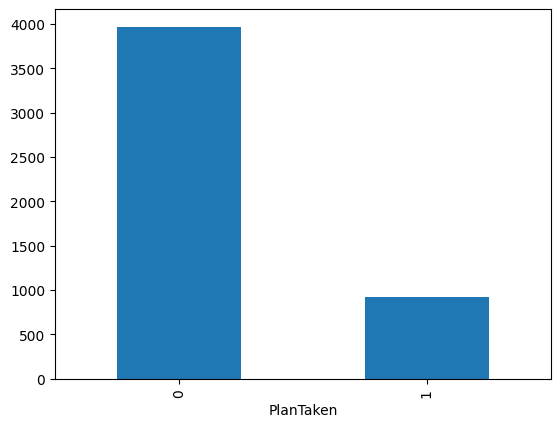

In [83]:
df['PlanTaken'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

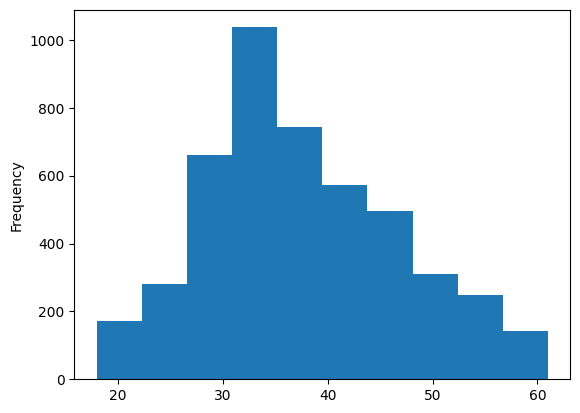

In [84]:
df['Age'].plot(kind='hist')

<Axes: xlabel='TypeofContact'>

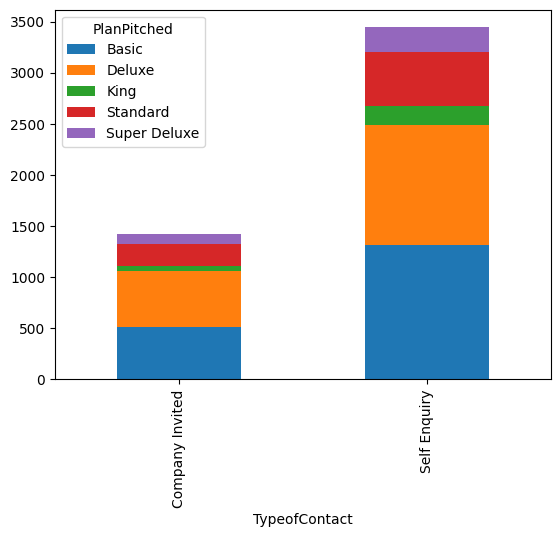

In [85]:
cross_tab=pd.crosstab(df['TypeofContact'], df['PlanPitched'])
cross_tab.plot(kind='bar', stacked=True)

<Axes: xlabel='PlanPitched'>

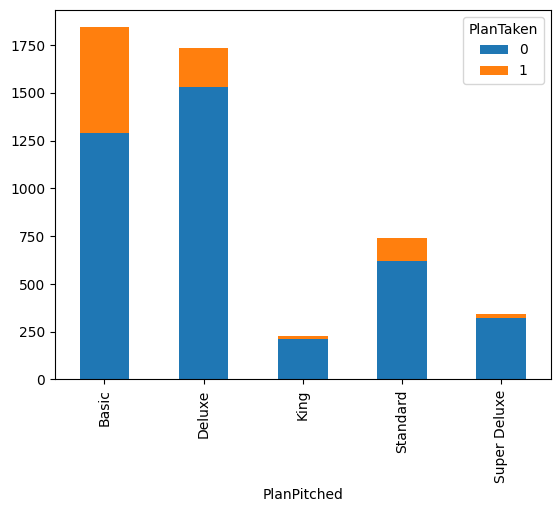

In [86]:
cross_tab=pd.crosstab(df['PlanPitched'], df['PlanTaken'])
cross_tab.plot(kind='bar', stacked=True)

<Axes: xlabel='CityTier'>

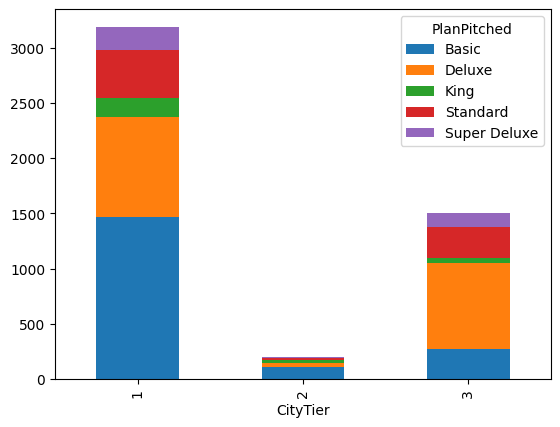

In [87]:
cross_tab=pd.crosstab(df['CityTier'], df['PlanPitched'])
cross_tab.plot(kind='bar', stacked=True)

<Axes: xlabel='CityTier'>

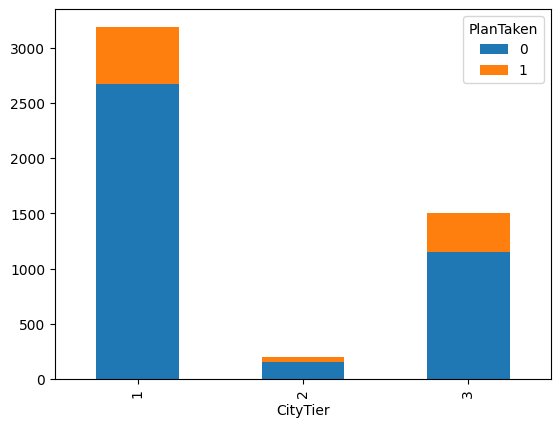

In [88]:
cross_tab=pd.crosstab(df['CityTier'], df['PlanTaken'])
cross_tab.plot(kind='bar', stacked=True)

<Axes: xlabel='Gender'>

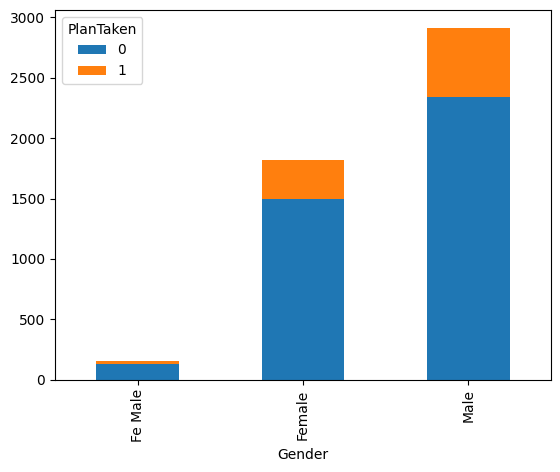

In [89]:
cross_tab=pd.crosstab(df['Gender'], df['PlanTaken'])
cross_tab.plot(kind='bar', stacked=True)

<Axes: xlabel='Occupation'>

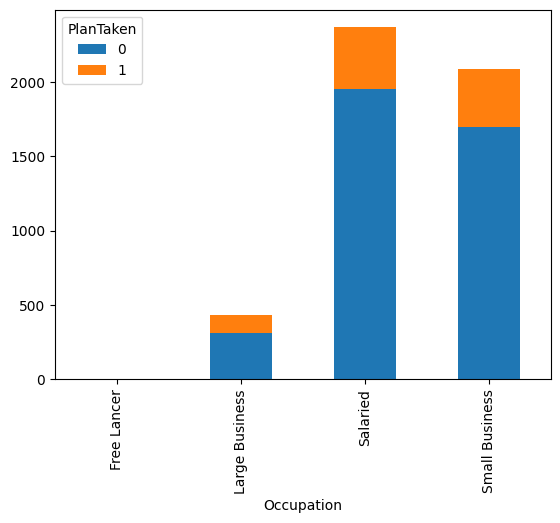

In [90]:
cross_tab=pd.crosstab(df['Occupation'], df['PlanTaken'])
cross_tab.plot(kind='bar', stacked=True)

<Axes: xlabel='PlanPitched'>

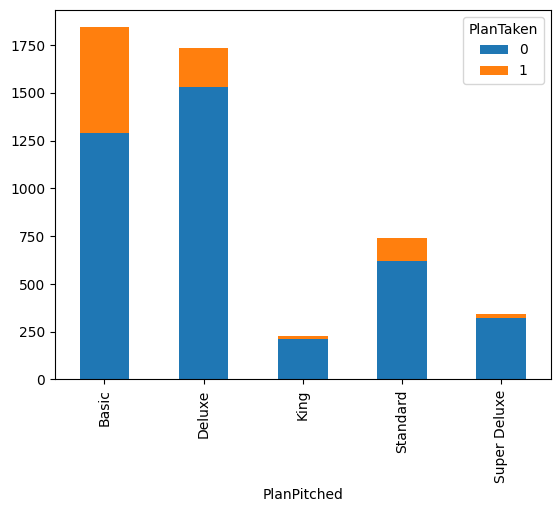

In [91]:
cross_tab=pd.crosstab(df['PlanPitched'], df['PlanTaken'])
cross_tab.plot(kind='bar', stacked=True)

<Axes: xlabel='Gender'>

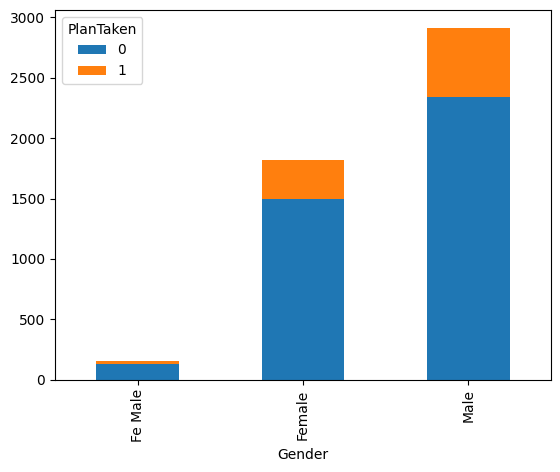

In [92]:
cross_tab=pd.crosstab(df['Gender'], df['PlanTaken'])
cross_tab.plot(kind='bar', stacked=True)

## Step 2: Data Preprocesssing

-Encoding Categorical Columns

-Fill Missing Values

In [93]:
df.isnull().sum().sort_values(ascending=False)

,0
DurationOfPitch,251
MonthlyIncome,233
Age,226
NumberOfUpgrades,140
NumberOfChildren,66
NumberOfFollowups,45
PreferredServiceStar,26
TypeofContact,25
Designation,0
PhoneContract,0


<Axes: ylabel='Frequency'>

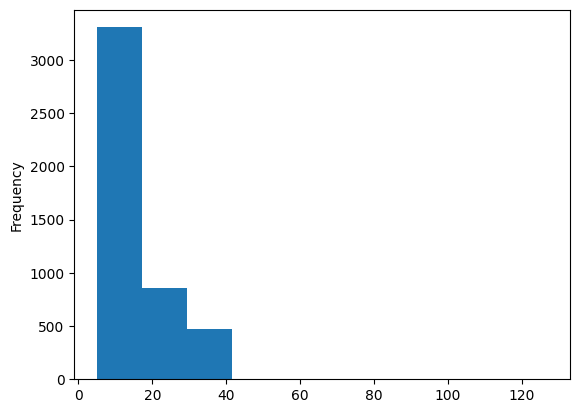

In [94]:
df['DurationOfPitch'].plot(kind='hist')

<Axes: ylabel='Frequency'>

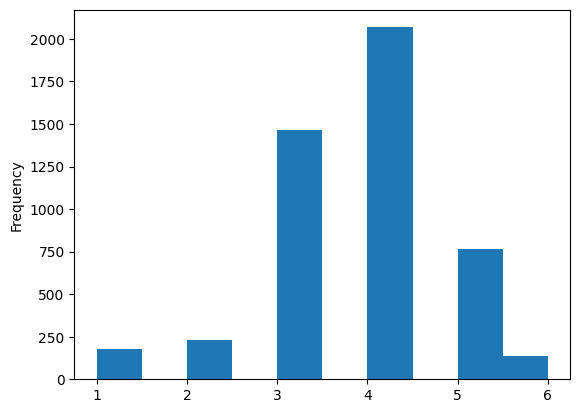

In [95]:
df['NumberOfFollowups'].plot(kind='hist')

<Axes: ylabel='Frequency'>

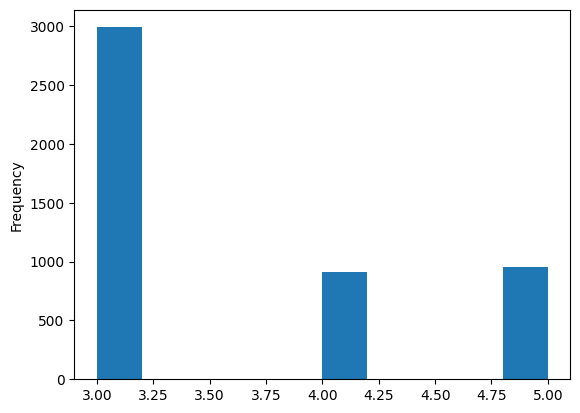

In [96]:
df['PreferredServiceStar'].plot(kind='hist')

<Axes: ylabel='Frequency'>

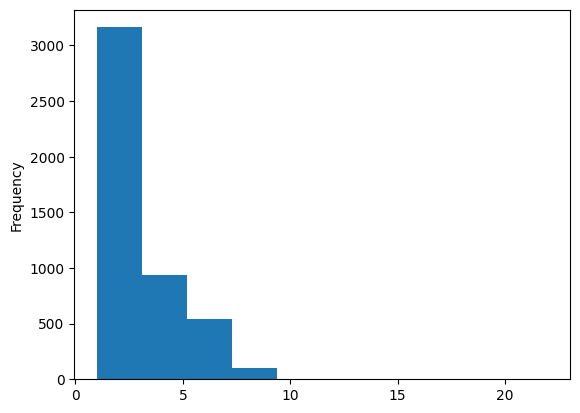

In [97]:
df['NumberOfUpgrades'].plot(kind='hist')

<Axes: ylabel='Frequency'>

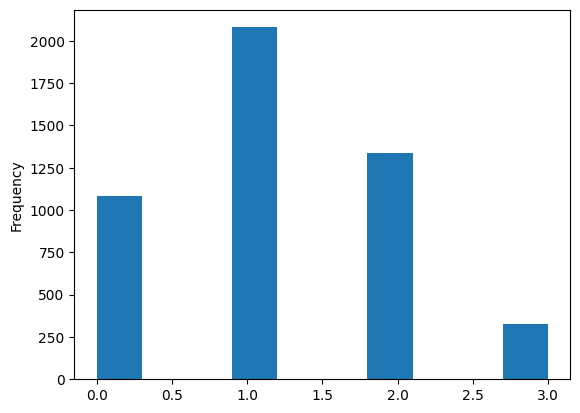

In [98]:
df['NumberOfChildren'].plot(kind="hist")

<Axes: ylabel='Frequency'>

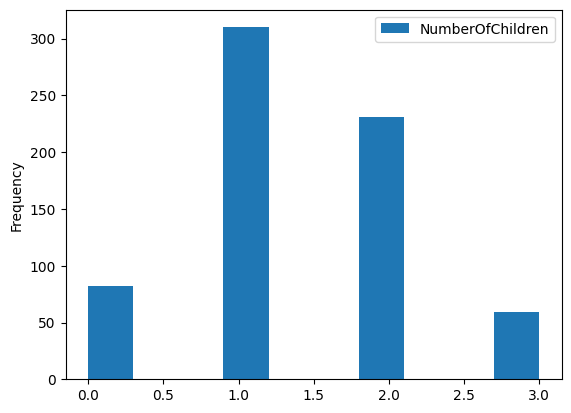

In [99]:
df[df['MaritalStatus'] == "Unmarried"][['MaritalStatus','NumberOfChildren']].plot(kind="hist")

In [100]:
#OneHotEncoding
contactTypeEncoder = LabelEncoder()
genderEncoder = LabelEncoder()
occupationEncoder = LabelEncoder()
planPitchedEncoder = LabelEncoder()
maritalStatusEncoder = LabelEncoder()
designationEncoder = LabelEncoder()
ageEncoder = LabelEncoder()

df['TypeofContact'] =  contactTypeEncoder.fit_transform(df['TypeofContact'])
df['Occupation'] =  occupationEncoder.fit_transform(df['Occupation'])
df['Gender'] =  genderEncoder.fit_transform(df['Gender'])
df['PlanPitched'] = planPitchedEncoder.fit_transform(df['PlanPitched'])
df['MaritalStatus'] = maritalStatusEncoder.fit_transform(df['MaritalStatus'])
df['Designation'] = designationEncoder.fit_transform(df['Designation'])

-Normally Distributed data is replced by mean

-Categorical columns are replaced by mode

-Skewed nature data are replaced by median

In [101]:
  # fill age
  df['Age'] = df['Age'].fillna(df['Age'].mean())

  # fill TypeofContact

  df['TypeofContact'] = df['TypeofContact'].fillna(df['TypeofContact'].mode()[0])

  # fill DurationOfPitch
  df['DurationOfPitch'] = df['DurationOfPitch'].fillna(np.floor(df['DurationOfPitch'].median()))

  # fill NumberOfFollowups

  df['NumberOfFollowups'] = df['NumberOfFollowups'].fillna(np.floor(df['NumberOfFollowups'].median()))

  # fill PreferredServiceStar

  df['PreferredServiceStar'] = df['PreferredServiceStar'].fillna(np.floor(df['PreferredServiceStar'].mode()[0]))

  # fill NumberOfUpgrades

  df['NumberOfUpgrades'] = df['NumberOfUpgrades'].fillna(np.floor(df['NumberOfUpgrades'].median()))

  # fill NumberOfChildren

  df['NumberOfChildren'] = df_copy['NumberOfChildren'].fillna(np.floor(df['NumberOfChildren'].median()))

  # fill MonthlyIncome

  df['MonthlyIncome'] = df['MonthlyIncome'].fillna(np.floor(df['MonthlyIncome'].median()))

In [102]:
df.isna().sum()

,0
CustomerID,0
PlanTaken,0
Age,0
TypeofContact,0
CityTier,0
DurationOfPitch,0
Occupation,0
Gender,0
NumberOfPersons,0
NumberOfFollowups,0


<Axes: ylabel='Frequency'>

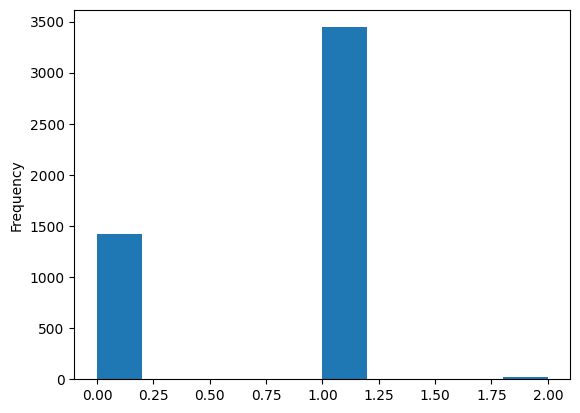

In [103]:
df['TypeofContact'].plot(kind="hist")

## Step 3: Feature Engineering

-Binning Age

-Handle Imbalance

-Feature Scaling (-1,1)

In [106]:
 # create age bin column
df['Age_Binned']=pd.cut(df['Age'], bins=[18,28,38,48,58,68], labels=['18-28', '28-38', '38-48', '48-58','58-68'])
df['Age_Binned']=ageEncoder.fit_transform(df['Age_Binned'])
df=df.drop(columns=['Age'])

In [107]:
df.head(5)

,CustomerID,PlanTaken,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersons,NumberOfFollowups,PlanPitched,PreferredServiceStar,MaritalStatus,NumberOfUpgrades,iPhone,PitchSatisfactionScore,PhoneContract,NumberOfChildren,Designation,MonthlyIncome,Age_Binned
0,200000,1,1,3,6.0,2,1,3,3.0,1,3.0,2,1.0,1,2,1,0.0,2,20993.0,2
1,200001,0,0,1,14.0,2,2,3,4.0,1,4.0,0,2.0,0,3,1,2.0,2,20130.0,3
2,200002,1,1,1,8.0,0,2,3,4.0,0,3.0,2,7.0,1,3,0,0.0,1,17090.0,1
3,200003,0,0,1,9.0,2,1,2,3.0,0,3.0,0,2.0,1,5,1,1.0,1,17909.0,1
4,200004,0,1,1,8.0,3,2,2,3.0,0,4.0,0,1.0,0,5,1,0.0,1,18468.0,1


Monthly income column have higher magnitude to effect the outcome. So, MinMaxScaler was used to limit the values from -1 to 1

In [112]:
monthlyIncomeScaler = MinMaxScaler(feature_range=(-1,1))
df['MonthlyIncome'] = monthlyIncomeScaler.fit_transform(df[['MonthlyIncome']])

In [113]:
df.head(5)

,CustomerID,PlanTaken,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersons,NumberOfFollowups,PlanPitched,PreferredServiceStar,MaritalStatus,NumberOfUpgrades,iPhone,PitchSatisfactionScore,PhoneContract,NumberOfChildren,Designation,MonthlyIncome,Age_Binned
0,200000,1,1,3,6.0,2,1,3,3.0,1,3.0,2,1.0,1,2,1,0.0,2,-0.590635,2
1,200001,0,0,1,14.0,2,2,3,4.0,1,4.0,0,2.0,0,3,1,2.0,2,-0.608305,3
2,200002,1,1,1,8.0,0,2,3,4.0,0,3.0,2,7.0,1,3,0,0.0,1,-0.670550,1
3,200003,0,0,1,9.0,2,1,2,3.0,0,3.0,0,2.0,1,5,1,1.0,1,-0.653781,1
4,200004,0,1,1,8.0,3,2,2,3.0,0,4.0,0,1.0,0,5,1,0.0,1,-0.642335,1


## Step 4: Feature Selection and Data Modelling

In [115]:
features = df.drop(['PlanTaken','CustomerID'], axis=1).columns
target =df['PlanTaken']
features

Index(['TypeofContact', 'CityTier', 'DurationOfPitch', 'Occupation', 'Gender',
       'NumberOfPersons', 'NumberOfFollowups', 'PlanPitched',
       'PreferredServiceStar', 'MaritalStatus', 'NumberOfUpgrades', 'iPhone',
       'PitchSatisfactionScore', 'PhoneContract', 'NumberOfChildren',
       'Designation', 'MonthlyIncome', 'Age_Binned'],
      dtype='object')

In [116]:
X=df[features]
y=df['PlanTaken']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [117]:
model_log = LogisticRegression(random_state=42)
model_log.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [122]:
train_score = model_log.score(X_train, y_train)
test_score = model_log.score(X_test, y_test)
print(f"Training Score: {train_score}")
print(f"Test Score: {test_score}\n\n")

Training Score: 0.8383513592516808
Test Score: 0.8282208588957055




In [124]:
test_preds =model_log.predict(X_test)
print("Classification Report")
print(classification_report(y_test,test_preds))

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1191
           1       0.61      0.25      0.35       276

    accuracy                           0.83      1467
   macro avg       0.73      0.61      0.63      1467
weighted avg       0.80      0.83      0.80      1467



<Axes: >

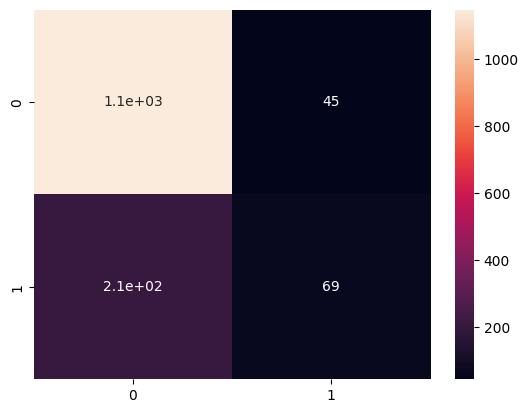

In [125]:
cf_matrix = confusion_matrix(y_test,test_preds)
sns.heatmap(cf_matrix, annot=True)